In [1]:
# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

import numpy as np

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function (pyplot)
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [30]:
# start AUTO with runner object
runner = ra.runAUTO()
r1 = ac.run(e='clustersred', c='clustersred', runner=runner)
r2 = ac.run(r1, c='clustersred.1', runner=runner)

Starting clustersred ...

  BR    PT  TY  LAB    PAR(8)        L2-NORM         U(1)          U(2)          U(3)          U(4)          U(5)          U(6)     
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1     5  EP    2   5.00000E-02   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00

 Total Time    0.329E-01
clustersred ... done
Starting clustersred ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)          U(4)          U(5)          U(6)     
   1     1  EP    1   2.50000E-01   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


   1   283  BP    2   5.32343E-01   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1   500        3   7.49343E-01   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  1000        4   1.24934E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  1348  BP    5   1.59734E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  1500        6   1.74934E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  2000        7   2.24934E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  2500        8   2.74934E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  3000        9   3.24934E+00   0.00000E+00   0.00000E+00   0.00000E+00 

   4   500       58   1.75101E+00   3.03783E+00   2.75489E+00  -6.37048E-01  -6.37048E-01  -6.37048E-01  -3.62352E-01   1.66101E-01
   4  1000       59   2.06649E+00   3.21838E+00   2.86765E+00  -6.36494E-01  -6.36494E-01  -6.36494E-01  -4.91097E-01   4.42293E-01
   4  1500       60   2.52613E+00   3.35453E+00   2.97905E+00  -6.22283E-01  -6.22283E-01  -6.22283E-01  -5.48541E-01   5.60132E-01
   4  2000       61   3.01557E+00   3.43793E+00   3.05133E+00  -6.15916E-01  -6.15916E-01  -6.15916E-01  -5.78906E-01   6.04415E-01
   4  2500       62   3.51250E+00   3.48629E+00   3.09112E+00  -6.16802E-01  -6.16802E-01  -6.16802E-01  -5.98366E-01   6.19468E-01
   4  2989  UZ   63   4.00000E+00   3.51214E+00   3.11068E+00  -6.19693E-01  -6.19693E-01  -6.19693E-01  -6.10272E-01   6.24062E-01

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)          U(4)          U(5)          U(6)     
   5   334  LP   64   1.72456E+00   2.99777E+00  -2.74216E+00   6.29002E-0

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


In [15]:
# load saved AUTO data
bd = r2
NDim = bd[0].c['NDIM']

# these are the types and labels for algebraic problems
# "user output point" is type number -4, so this works for that
AUTOtypes = ["","BP","LP","HB","","","UZ","","","EP"]
AUTOlabels = ["","branch point","fold","Hopf bifurcation","regular output point","","user output point","",
                  "", "end point"]

# branches of the solution
branches = [ 
         {  "par"        : br.coordarray[0,:], 
            "L2norm"     : br.coordarray[1,:],
            "branchnum"  : br.BR,
            "parS"       : np.array( [ bd(id).PAR(1) for id in br.getLabels() ] ),
            "xS"         : np.array( [ bd(id)[0]['u'] for id in br.getLabels() ] ),
            "PT"         : np.array( [ br[ bd(id)['PT']-1 ]['PT'] for id in br.getLabels() ]  )
         } for br in bd ]
# individual solutions
sols = [ {  "u"         : np.array( s[0]['u'] ),
            "par"       : s.PAR,
            "branchnum" : s.data['BR'],
            "typenum"   : s.data['TY number'],
            "type"      : AUTOtypes[ s.data['TY number'] ],
            "typename"  : AUTOlabels[ s.data['TY number'] ]
         } for s in bd() ]

# bifurcation points
HB = [ s for s in sols if s["type"] == "HB" ]
BP = [ s for s in sols if s["type"] == "BP" ]

In [16]:
# stable portions
stablebranches = [ [] for b in branches ]
for i, b in enumerate(branches):
    indices = np.array( [j for j, p in enumerate(b['PT']) if p < 0] )
    if len(indices) > 0:
        stablebranches[i] = {
            "parS" : b['parS'][indices],
            "xS"   : b['xS'][indices],
            "PT"   : b['PT'][indices]
        }

Text(0, 0.5, 'inhibitory')

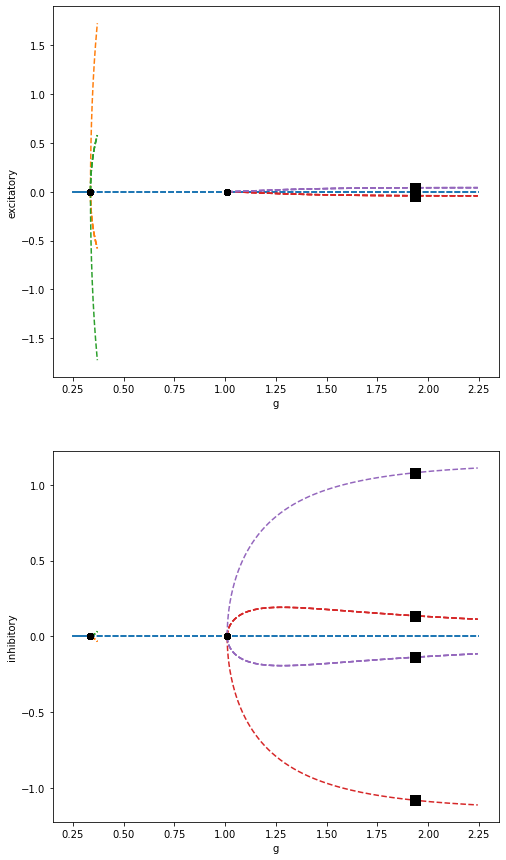

In [26]:
plt.figure(figsize=(8, 15))
fontsize=18

ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
frac = 0.8
Nc = 4
exsplit = Nc

# Hopf bifurcations and branch points
xHB = np.array( [ s['par']['PAR(1)'] for s in HB ] )
yHB = np.array( [ s['u'] for s in HB ] )
xBP = np.array( [ s['par']['PAR(1)'] for s in BP ] )
yBP = np.array( [ s['u'] for s in BP ] )

for index, branch in enumerate(branches):
#     bcolor = 'C'+str( branch["branchnum"] - 1 )
    bcolor = 'C'+str(index)
    ax1.plot( branch['parS'], branch['xS'][:,:exsplit], '--', c=bcolor)
    ax2.plot( branch['parS'], branch['xS'][:,exsplit:], '--', c=bcolor)
    if stablebranches[index] != []:
        ax1.plot( stablebranches[index]['parS'], stablebranches[index]['xS'][:,:exsplit], '-', c=bcolor)
        ax2.plot( stablebranches[index]['parS'], stablebranches[index]['xS'][:,exsplit:], '-', c=bcolor)
#     ax2.plot( branch['parS'], branch['xS'][:,exsplit], c=bcolor)
    if len(xHB) > 0:
        ax1.plot( xHB, yHB[:,:exsplit], 'sk', markersize=10 )
        ax2.plot( xHB, yHB[:,exsplit:], 'sk', markersize=10 )
    if len(xBP) > 0:
        ax1.plot( xBP, yBP[:,:exsplit], 'ok')
        ax2.plot( xBP, yBP[:,exsplit:], 'ok')
    
ax1.set_xlabel('g')
ax1.set_ylabel('excitatory')
ax2.set_xlabel('g')
ax2.set_ylabel('inhibitory')

# legendlabels = ['0 solution','3-1 inh','3-1 inh']
# lines = [ mpl.lines.Line2D([0,1],[0,1], linestyle='--', color='C'+str(i) ) for i, lab in enumerate(legendlabels) ]
# ax1.legend(lines, legendlabels)
# ax2.legend(lines, legendlabels)

In [23]:
branches[1]['xS'][10]

array([ 9.43958541e-02, -3.14664611e-02, -3.14664611e-02, -3.14664611e-02,
       -5.29856479e-06, -5.29856479e-06, -5.29856479e-06, -5.29856479e-06])

In [ ]:
# save output needed to make plots, etc
np.savez_compressed('data/8a_cluster40_2', b=branches, s=sols, HB=HB, BP=BP, sb=stablebranches, N=NDim)

<ipython-input-127-a80d5446ae3e>:8: RuntimeWarning: invalid value encountered in sqrt
  xipred = np.sqrt( 3*(g1 - gstar)/g1**3)
<ipython-input-127-a80d5446ae3e>:9: RuntimeWarning: invalid value encountered in sqrt
  xipred2 = 0.5*np.sqrt( (5/(g1**2)) - (np.sqrt( (5*g1**5)*(24*gstar - 19*g1) ) / g1**5 ) )
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


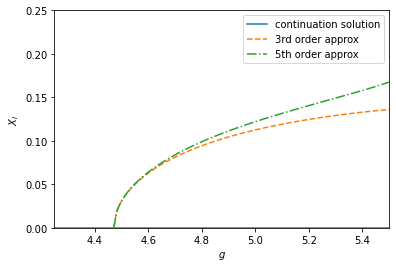

In [127]:
a = 4
mee = 0.25
gstar = np.sqrt(NDim)/(a*mee)

g1 = branches[0]['parS']
xi1 = np.abs( branches[0]['xS'][:,16] )

xipred = np.sqrt( 3*(g1 - gstar)/g1**3)
xipred2 = 0.5*np.sqrt( (5/(g1**2)) - (np.sqrt( (5*g1**5)*(24*gstar - 19*g1) ) / g1**5 ) )

plt.figure()
plt.plot(g1,xi1,'-',g1,xipred,'--',g1,xipred2,'-.')
plt.axis([4.25, 5.5, 0, 0.25]) 
plt.xlabel('$g$')
plt.ylabel('$X_I$')
plt.legend(['continuation solution','3rd order approx','5th order approx'])
plt.savefig('images/Xiapprox.eps')

In [37]:
branches[0]['PT']

array([ -250,  -282,  -500,  -750, -1000, -1250, -1500, -1750, -2000,
       -2250, -2500, -2750, -3000, -3250, -3500, -3750, -4000, -4250,
       -4500, -4551,  4750,  5000,  5250,  5500,  5750,  6000,  6250,
        6500,  6750,  7000,  7250,  7500,  7750,  8000,  8250,  8500,
        8750,  9000,  9250,  9500,  9750,    -1,  -251,  -501,  -751,
        -956])

In [15]:
stablebranches[9]

IndexError: list index out of range